In [1]:
%cd /global/home/users/yifengh3/VAE/EMD_VAE
%load_ext autoreload
%autoreload 2

/global/home/users/yifengh3/VAE/EMD_VAE


In [2]:
from sample_and_analysis import VAE_sampler

1 Physical GPUs, 1 Logical GPU
INFO:tensorflow:Using MirroredStrategy with devices ('/device:GPU:0',)
INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0',), communication = CommunicationImplementation.AUTO


# Sample from the validation data

In [4]:
original_data_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/B_background.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2",
                    train_valid_split=800000)

(1000000, 150)
Memory in GB: 2.250075340270996
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 50, 1024)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 1024)     1049600 

vae input size: (200000, 50, 4)
validation data size: (200000, 50, 3)
sampling data
getting plot 1 out of 5


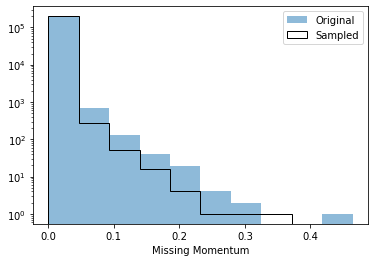

getting plot 2 out of 5


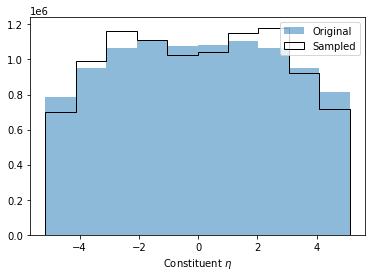

getting plot 3 out of 5


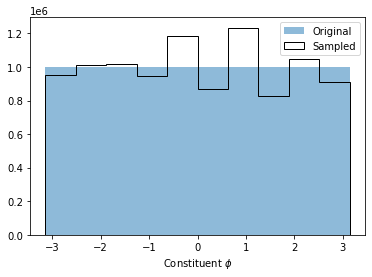

getting plot 4 out of 5


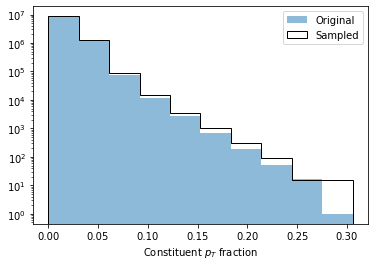

getting plot 5 out of 5


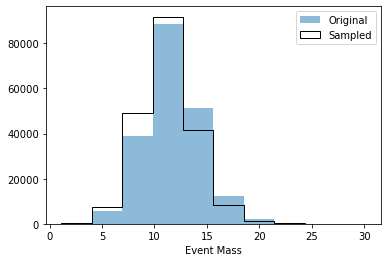

In [5]:
background_input, background_output, outjets_background = original_data_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None)

# B signal sample

In [6]:
b_signal_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/B_signal.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2")

(50000, 150)
Memory in GB: 0.1125037670135498
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_13 (LeakyReLU)      (None, 50, 1024)     0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 50, 1024)     1049600     leaky_re_lu_13[0][0]             
__________________________________________________

vae input size: (50000, 50, 4)
validation data size: (50000, 50, 3)
sampling data
getting plot 1 out of 5


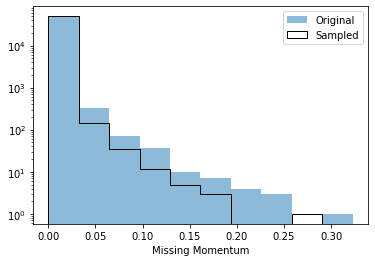

getting plot 2 out of 5


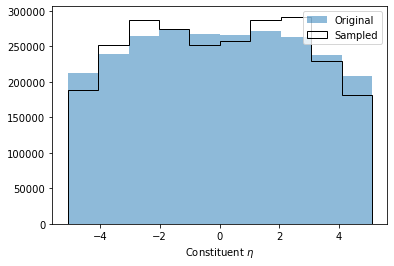

getting plot 3 out of 5


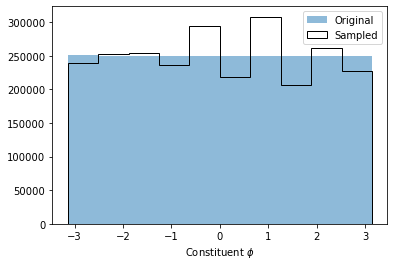

getting plot 4 out of 5


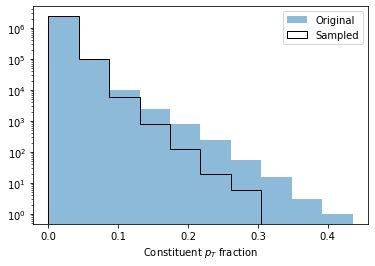

getting plot 5 out of 5


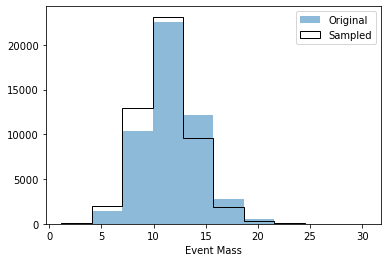

In [7]:
b_input, b_output, b_outjets = b_signal_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None)

# H signal sample

In [8]:
h_signal_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/h_signal.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2")

(50000, 150)
Memory in GB: 0.1125037670135498
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_26 (LeakyReLU)      (None, 50, 1024)     0           conv1d_8[0][0]                   
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 50, 1024)     1049600     leaky_re_lu_26[0][0]             
__________________________________________________

vae input size: (50000, 50, 4)
validation data size: (50000, 50, 3)
sampling data
getting plot 1 out of 5


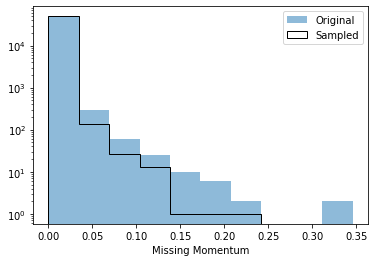

getting plot 2 out of 5


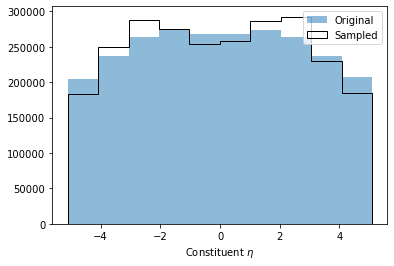

getting plot 3 out of 5


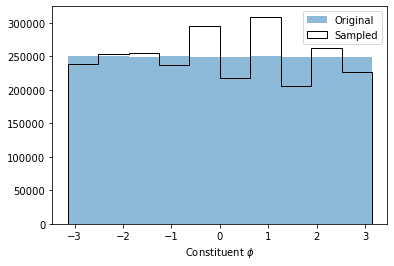

getting plot 4 out of 5


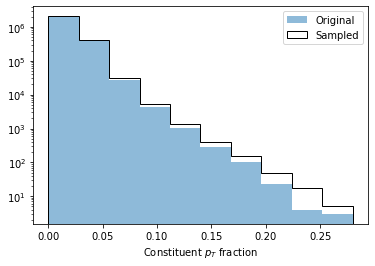

getting plot 5 out of 5


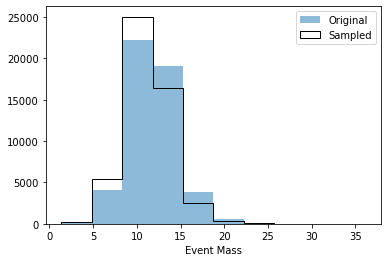

In [9]:
h_input, h_output, h_outjets = h_signal_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None)

# Signal/Background Compare

1 Physical GPUs, 1 Logical GPU
getting plot 1 out of 5


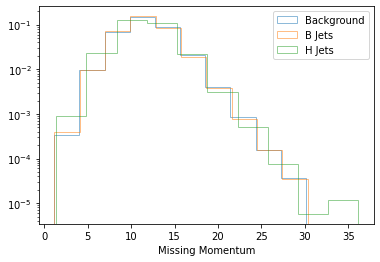

getting plot 2 out of 5


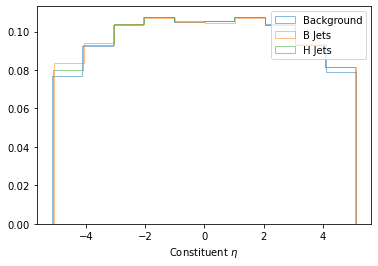

getting plot 3 out of 5


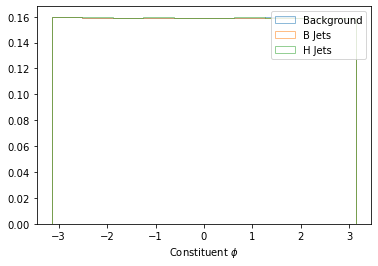

getting plot 4 out of 5


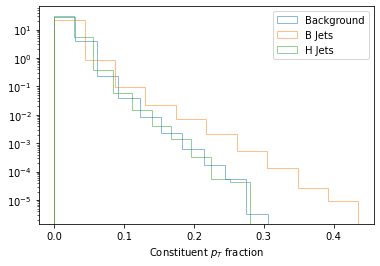

getting plot 5 out of 5


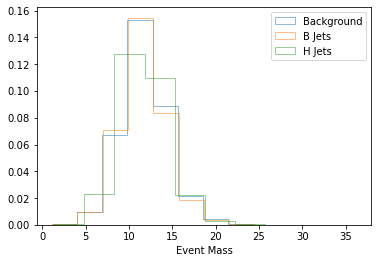

In [11]:
plotting_method_name = \
            [method for method in dir(VAE_sampler) if method.startswith('_VAE_sampler__plots')]
plotting_function = [eval("VAE_sampler."+func_name) for func_name in plotting_method_name]
call_args = [background_output, b_output, None]
call_kargs = {"additional_signal":[h_output], "data_name":["Background","B Jets","H Jets"]}
for count,func in enumerate(plotting_function):
    print("getting plot {} out of {}".format(count+1,len(plotting_function)))
    func(*call_args,**call_kargs)